In [82]:
#Menjalankan library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **PENDAHULUAN**


## **Pendahuluan**

Sebuah supermarket menjual beberapa barang seperti daging, ikan, buah buahan, minuman dan emas. Barang tersebut bisa dibeli atau didapatkan melalui web, katalog toko dan pembelian langsung di toko. 

Supermarket tersebut ingin meningkatkan efektivitas strategi pemasarannya dengan memahami pola - pola dari perilaku, karakteristik dan preferensi pelangganya agar strategi pemasaran bisa sesuai dengan kelompok target pelanggan dan bisa memiliki potensi untuk melakukan transaksi. Untuk itu diperlukan sebuah analisis kepribadian pelanggan untuk memahami dan memberikan informasi dari karakteristik dan kebutuhan pelanggan.

## **Tujuan**

Dari data yang ada dan keinginan dari supermarket tersebut, tujuan yang harus dicapai adalah :

1. Mengetahui karakteristik pelanggan bedasarkan usia dan pendapatan.
2. Mengetahui produk yang diminati bedasarkan karakteristik pelanggan.
3. Mengetahui cara yang digunakan untuk berbelanja (Web, katalog, toko).

## **Supermarket Customers Data Dictionary**


People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

# **DATA UNDERSTANDING**

## **Informasi Data**

In [83]:
#Mengimport data
raw_data = pd.read_csv('Supermarket Customers.csv', sep='\t')
df = raw_data.copy()

In [84]:
#Melihat 5 data teratas
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [85]:
#Melihat 5 data terbawah
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [86]:
#Melihat kolom kolom dari data
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [87]:
#Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [88]:
#Statistik data bermuatan numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [89]:
#Statitik data non numerik
df.describe(exclude='number').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [90]:
#Mising value pada data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [91]:
#Persentase missing value
persenan_missing_value = df.isna().sum()/df.shape[0]*100
persenan_missing_value

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [92]:
#Duplicate pada data
df.duplicated().sum()

np.int64(0)

## **Kesimpulan**

Dari pembedahan dasar data di atas, informasi yang didapat adalah :
* Dataset pelanggan memiliki 2.240 baris dan 29 kolom.
* Tipe data pada kolom dataset tersebut adalah 1 float64, 25 int64 dan 3 object
* Terdapat missing value pada kolom Income sebanyak 24 missing value yang mana persentasenya adalah 1,07% dari keseluruhan data
* Tidak ada data yang terduplikasi

# **PEMBERSIHAN DATA DAN PENYIAPAN DATA**

Sebelum melakukan analisi sebaiknya data dibersihkan dahulu supaya proses analisa bisa jauh lebih maksimal dan presisi.


## **Pembersihan Data**

Dari informasi data di atas, data missing value ada sebanyak 24 dan persentasenya hanya 1%. Jadi menghapus missing values tidak akan berdampak analisi keseluruhan.

In [93]:
#Menghapus missing value
df.dropna(inplace=True)

In [94]:
#Data setelah menghapus missing value
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## **Penyiapan Data**

Mengubah nama kolom dan menambahkan nama kolom baru untuk mempermudah analisa

In [95]:
df['Marital_Status']

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2216, dtype: object

In [96]:
#Mengubah bebrapa nama kolom
df = df.rename(columns={
    'MntWines' : 'Wine',
    'MntFruits' : 'Fruit',
    'MntMeatProducts' : 'Meat_Product',
    'MntFishProducts' : 'Fish_Product',
    'MntSweetProducts' : 'Sweet_Products',
    'MntGoldProds' : 'Gold_Products',
    'NumDealsPurchases'  : 'Discount',
    'NumWebPurchases' : 'Web_Purchase',
    'NumCatalogPurchases' : 'Catalog_Purchase',
    'NumStorePurchases' : 'Store_Purchase',
    'NumWebVisitsMonth' : 'Web_Visit',
    'Response' : 'AcceptedCmp6'
})

In [97]:
#Mengubah baris dari kolom Living Status
df['Marital_Status'] = df['Marital_Status'].replace({'Single' : 'Alone',
                                                   'Divorce' : 'Alone',
                                                   'Widow' : 'Alone',
                                                   'Absurd' : 'Alone',
                                                   'YOLO' : 'Alone',
                                                   'Married' : 'Together'})

Membuat kolom baru bedasarkan umur

In [98]:
#Mengubah tipe data pada kolom Dt_Customer menjadi date time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')

In [99]:
df.sort_values('Dt_Customer',ascending=False).head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6
989,453,1956,PhD,Alone,35340.0,1,1,2014-06-29,1,27,...,5,0,0,0,0,0,0,3,11,0


Dari informasi di atas, data terakhir yang didapat adalah pada tahun 2014. Dapat disimpulkan bahwa data ini ada pada tahun 2015. Ini dibutuhkan untuk membuat kolom baru bedasarkan usia dari para pelanggan agar pelanggan dapat dikelompokan sesuai usianya.

In [100]:
#mencari umur pelanggan
tahun = 2015
df['Age'] = tahun - df['Year_Birth']

In [101]:
#Mengelompokkan bedasarkan usia
df['Age_stages'] = df['Age'].apply(
    lambda x : 'Adolescene 14-20' if x < 21 else
    'Youth 20-34' if x < 35 else
    'Maturity 35-49' if x < 50 else
    'Aging 50-63' if x < 64 else
    'Old Age > 64'               
)


In [102]:
#Mengelompokkan bedasarkan income
df['Economic_class'] = df['Income'].apply(
    lambda x : 'Lower Class' if x < 16000 else
    'Working class' if x < 35000 else
    'Lower Middle Class' if x < 100000 else
    'Upper Middle Class' if x < 500000 else
    'Upper Class'               
)

In [103]:
#Menambahkan kolom baru untuk total pembelian barang
df['Total_Spent'] = df[['Wine', 'Fruit', 'Meat_Product', 'Fish_Product', 'Sweet_Products', 'Gold_Products']].sum(axis=1)


In [104]:
#Menambahkan kolom baru untuk total cara pembelian
df['Total_Purchase'] = df[['Web_Purchase', 'Catalog_Purchase', 'Store_Purchase']].sum(axis=1)


# **OUTLIERS**

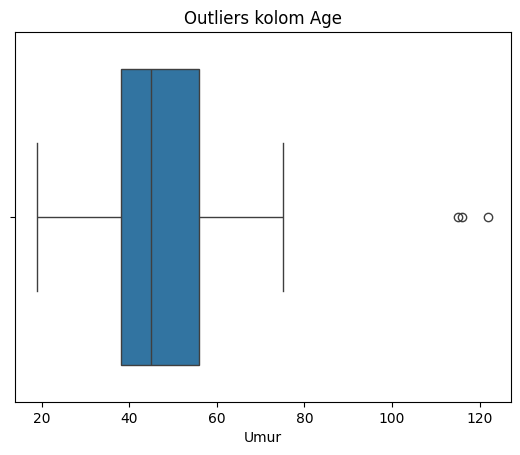

In [49]:
#Memeriksa Outlier dari kolom Age
sns.boxplot(x=df['Age'])
plt.title('Outliers kolom Age')
plt.xlabel('Umur')
plt.show()

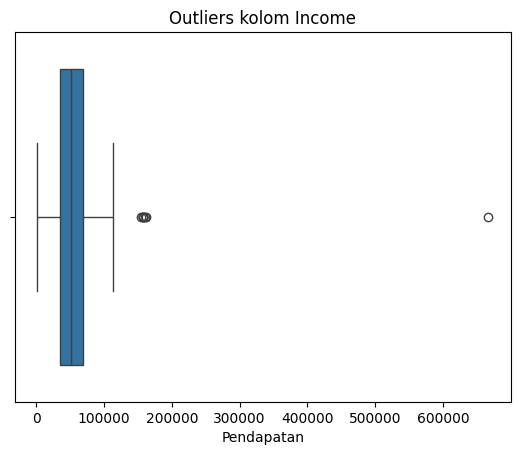

In [26]:
#Memeriksa outlier dari kolom income 
sns.boxplot(x=df['Income'])
plt.title('Outliers kolom Income')
plt.xlabel('Pendapatan')
plt.show()

In [105]:
Q1 = df[['Age', 'Income']].quantile(0.25)
Q3 = df[['Age', 'Income']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: Age          11.0
Income   -14525.5
dtype: float64
Upper Bound: Age           83.0
Income    118350.5
dtype: float64


In [106]:
#Menghapus outliers
df = df[df['Age'] < 83]
df = df[df['Income'] < 200000]

In [107]:
df.to_csv('Supermarket Customer Cleaned Version.csv', index=False)

# **VISUALISASI DATA**

## Korelasi

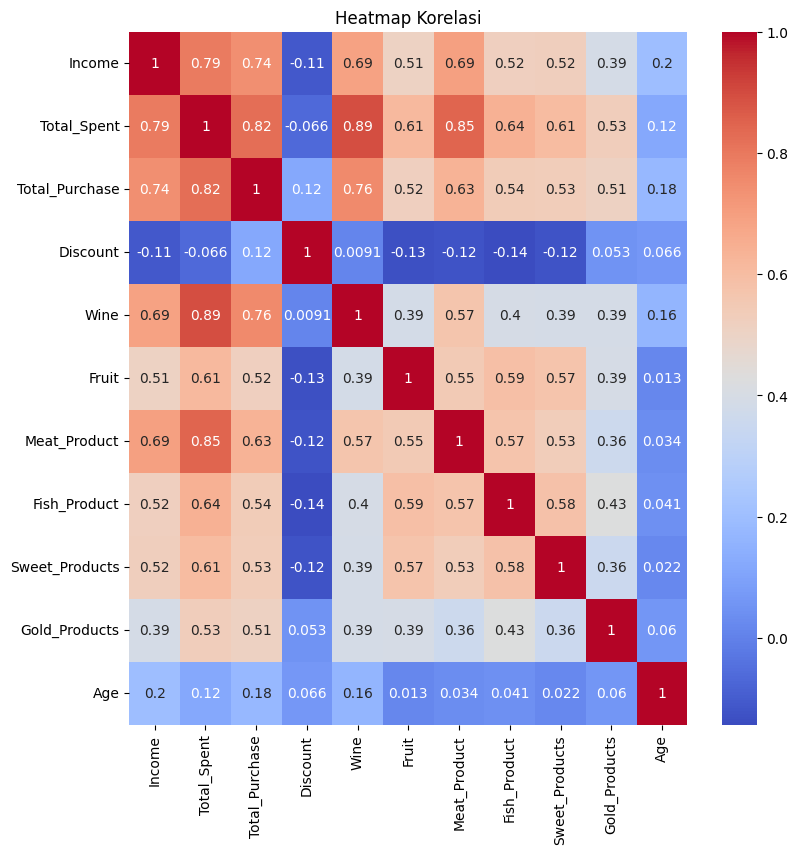

In [ ]:
corr_columns = df[['Income', 'Total_Spent', 'Total_Purchase', 'Discount', 'Wine', 'Fruit', 'Meat_Product',
       'Fish_Product', 'Sweet_Products', 'Gold_Products','Age']].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr_columns, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

Dari gambar di atas dapat diambil kesimpulan bahwa :
1. Wine dan produk daging berkontribusi pada total spent engan korelasi 0.89 dan 0.85. Ini menandakan produk tersebut paling banyak dibeli oleh pelanggan.
2. Diskon tidak berpengaruh pada pelanggan untuk membeli banyak pembelian (Total spent)
2. Usia kurang berpengaruh terhadap jenis produk yang dibeli dan total pembelian atau pengeluaran.


## Distribusi bedasarkan Usia dan Kelas Ekonomi

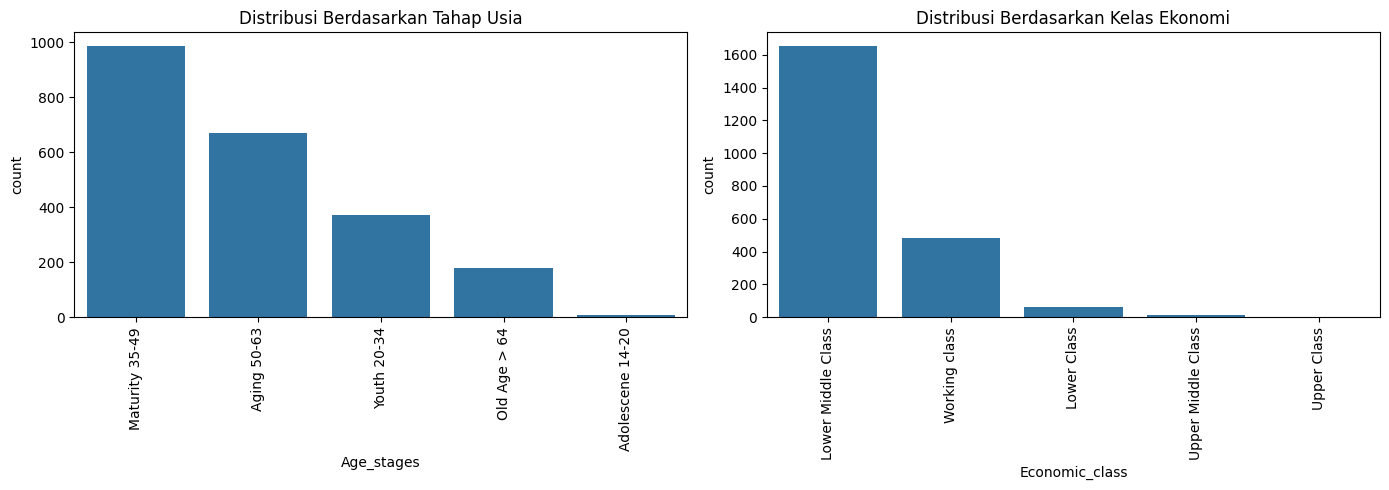

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

sns.countplot(data=df, x='Age_stages', order=df['Age_stages'].value_counts().index, ax=ax1)
ax1.set_title('Distribusi Berdasarkan Usia')
ax1.tick_params(axis='x', rotation=90)

sns.countplot(data=df, x='Economic_class', order=df['Economic_class'].value_counts().index, ax=ax2)
ax2.set_title('Distribusi Berdasarkan Kelas Ekonomi')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Dari gambar di atas kesimpulan yang di dapat adalah :
1. Kelompok Maturity (35-49) menjadi kelompok yang tertinggi sebagai pelanggan.
2. Kelas ekonomi yang paling banyak menjadi pelanggan adalah Lower Middle Class.

## Rata rata pembelian produk

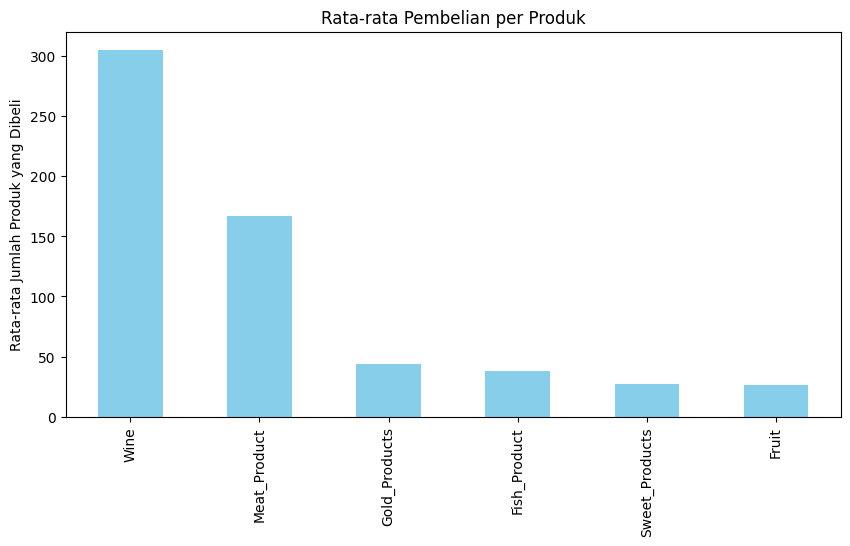

In [ ]:
df[['Wine', 'Fruit', 'Meat_Product', 'Fish_Product', 'Sweet_Products', 'Gold_Products']].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Rata-rata Pembelian per Produk')
plt.ylabel('Rata-rata Jumlah Produk yang Dibeli')
plt.show()

Wine menjadi produk yang sering dibeli

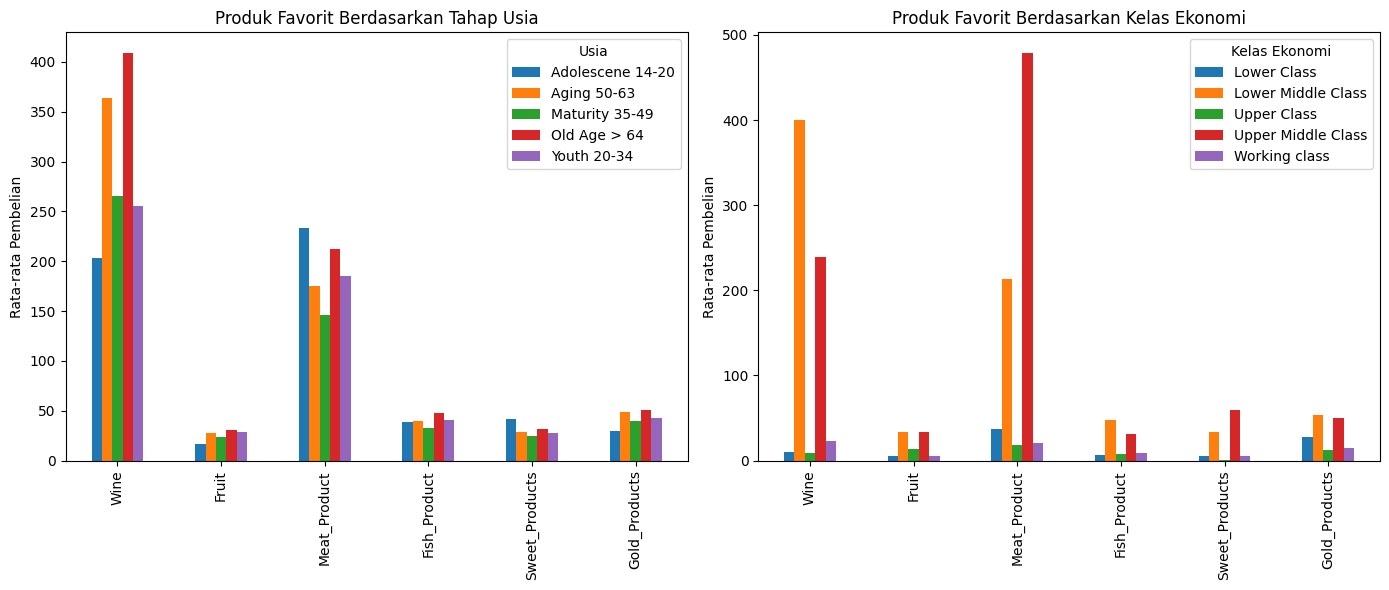

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Plot 1: Produk favorit berdasarkan Age_stages
df.groupby('Age_stages')[['Wine', 'Fruit', 'Meat_Product', 'Fish_Product', 'Sweet_Products', 'Gold_Products']]\
  .mean().T.plot(kind='bar', ax=ax1)
ax1.set_title('Produk Favorit Berdasarkan Tahap Usia')
ax1.set_ylabel('Rata-rata Pembelian')
ax1.legend(title='Usia')

# Plot 2: Produk favorit berdasarkan Economic_class
df.groupby('Economic_class')[['Wine', 'Fruit', 'Meat_Product', 'Fish_Product', 'Sweet_Products', 'Gold_Products']]\
  .mean().T.plot(kind='bar', ax=ax2)
ax2.set_title('Produk Favorit Berdasarkan Kelas Ekonomi')
ax2.set_ylabel('Rata-rata Pembelian')
ax2.legend(title='Kelas Ekonomi')

plt.tight_layout()
plt.show()

**1. Produk Favorit bedasarkan usia**

Pada produk Wine, sering dibeli oleh old age (>64 tahun).

Pada produk Buah, pembelian paling tinggi oleh pelanggan old age (>64 tahun).

Pada produk Daging, pelanggan yang paling tinggi membelinya ada pada Adolesence (14-20).

Pada produk Ikan, yang membeli paling tinggi ada pada usia old age (>64 tahun).

Pada produk permen, pembeli terbanyak ada pada usia Adolesence (14-20).

Pada produk emas, pembeli tertinggi adalah old age (>64 tahun).

**2. Produk Favorit bedasarkan kelas ekonomi**

Wine sering dibeli oleh Lower Middle Class.

Buah menjadi produk yang sering dibeli oleh Lower Middle Class dan Upper Middle Class.

Daging menjadi produk yang sering dibeli oleh Upper Middle Class.

Ikan paling banyak dibeli oleh Lower Middle Class.

Permen menjadi produk yang sering dibeli oleh Upper Middle Class.

Emas menjadi produk yang sering dibeli oleh Lower Middle Class.

## Cara Pembelian

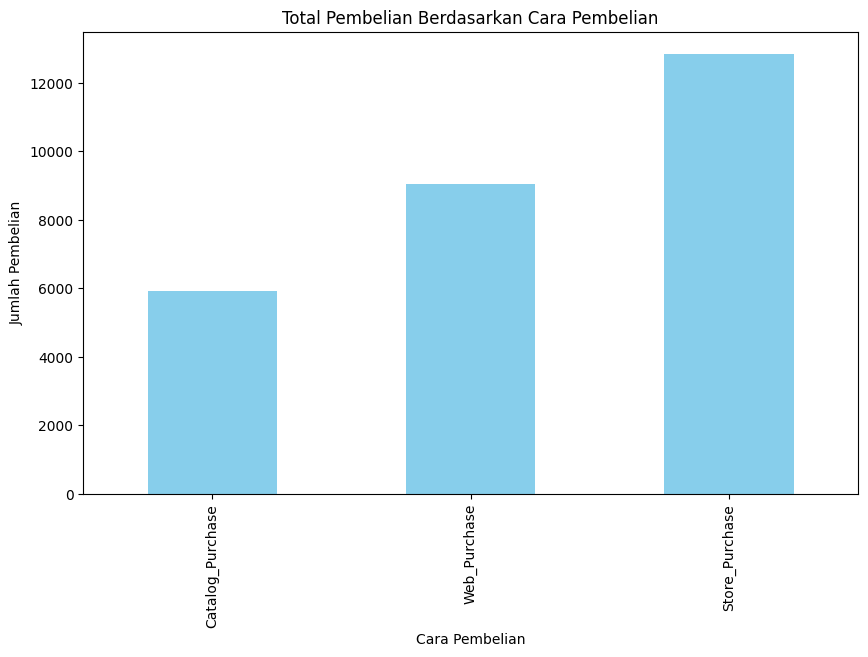

In [115]:
plt.figure(figsize=(10, 6))
df[['Web_Purchase', 'Catalog_Purchase', 'Store_Purchase']].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Pembelian Berdasarkan Cara Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xlabel('Cara Pembelian')
plt.show()

Pembelian langsung ke toko menjadi pilihan tertinggi para pembeli

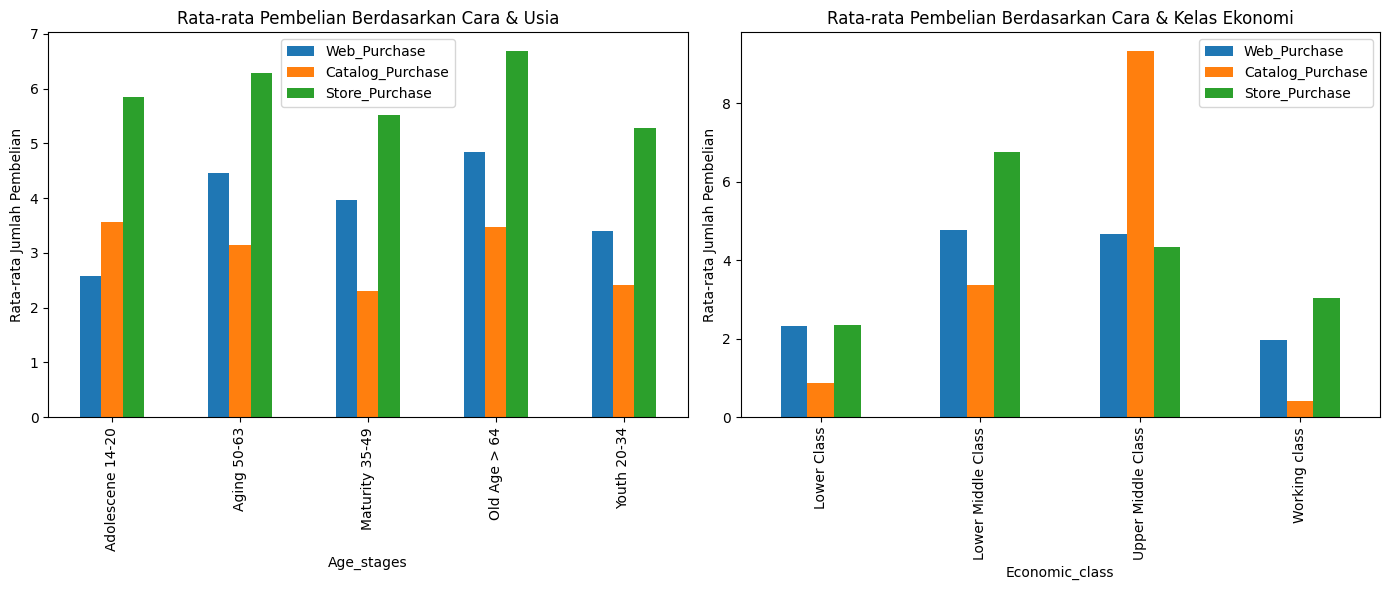

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

df.groupby('Age_stages')[['Web_Purchase', 'Catalog_Purchase', 'Store_Purchase']].mean().plot(kind='bar', ax=ax1)
ax1.set_title('Rata-rata Pembelian Berdasarkan Cara & Usia')
ax1.set_ylabel('Rata-rata Jumlah Pembelian')
ax1.tick_params(axis='x')

df.groupby('Economic_class')[['Web_Purchase', 'Catalog_Purchase', 'Store_Purchase']].mean().plot(kind='bar', ax=ax2)
ax2.set_title('Rata-rata Pembelian Berdasarkan Cara & Kelas Ekonomi')
ax2.set_ylabel('Rata-rata Jumlah Pembelian')
ax2.tick_params(axis='x')

plt.tight_layout()
plt.show()

**1. Rata rata cara pembelian bedasarkan usia**

Kelompok pelanggan dengan usia Old age senang berbelanja langsung ke toko.

Old age dan juga aging menjadi kelompok tertinggi untuk melaukakn pembelian lewat web

Sedangkan kelompok pelanggan Adolescene menjadi yang tertingi untuk pembelian lewat katalog.

**2. Rata rata cara pembelian bedasarkan kelas ekonomi**

Untuk rata rata pembelian pada kelas ekonomi, Upper Middle Class senang melakukan pembelian dengan katalog.

Pembelian Web menjadi pembelian yang banyak di lakukan oleh Lower Middle Class dibanding kelas lainnya.

Working Class lebih sering berbelanja di toko.




# **KESIMPULAN DAN REKOMENDASI**

## Kesimpulan

1. Produk Wine dan Produk meat menjadi korelasi tinggi terhadap total spent. Produk produk tersebut menjadi penyumbang utama pendapatan toko.

2. korelasi antara diskon dan total spent sangat kecil, yang menjadikan diskon tidak mendorong pembelian secara signifikan.

3. Kelompok umur Maturity (35-49) dan kelompok Aging (50-63) menjadi pelanggan paling banyak di toko. Lower middle class menjadi pelanggan paling banyak dan aktif berbelanja di toko maupun web.





## Rekomendasi

1. Memprioritaskan promosi dan perbanyak stok pada produk wine dan poduk meat karena produk tersebut sangat berkontribusi pada pembelian.

2. Mengganti cara diskon dengan pendekatan diskon bedasarkan histori pembelian dan diskon loyalitas atau point reward.

3. Membuat promosi pada ekonomi kelas sesuai cara pembeliannya :

    Lower Middle Class (web/store): Promosi online, voucher, campaign digital.

    Upper Middle Class (catalogue): Penawaran eksklusif via katalog, email premium.

    Working & Lower Class (store): Brosur fisik, diskon toko langsung, promosi komunitas.

4. pembelian di toko masih sangat penting karena banyak pembeli yang membeli di toko, pastikan toko memberikan pengalaman belanja yang optimal.